In [1]:
import tensorflow as tf
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

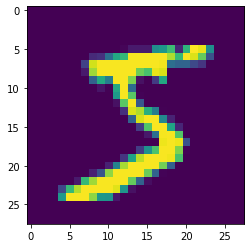

In [5]:
plt.imshow(x_train[0])

In [6]:
## now lets have a look at the image array
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
## as we can see, there is a huge range of numbers from 0 to 255
## so we need to normalize this data

In [8]:
## we have two options for normalizing: 
## 1. divide by range i.e 255
## 2. use tf.keras.utils

In [9]:
## lets use tensorflow
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [10]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [11]:
## now we can see that the values are normalized
## lets see the difference in the image

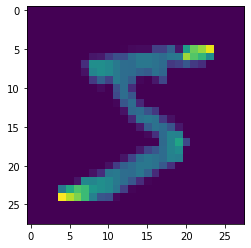

In [12]:
plt.imshow(x_train[0])

In [13]:
## as we can see the image is little blurred now. This is because of normalization.


In [14]:
## Now lets create a model for our data

In [15]:
## lets see the input shape for our model
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [16]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(128, activation='relu'),
                                   tf.keras.layers.Dense(10, activation='softmax')])

In [17]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [18]:
model.fit(x_train, y_train, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3169 - accuracy: 0.9113
Epoch 2/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1437 - accuracy: 0.9579
Epoch 3/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0997 - accuracy: 0.9701
Epoch 4/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0743 - accuracy: 0.9780
Epoch 5/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0591 - accuracy: 0.9826
Epoch 6/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0466 - accuracy: 0.9861
Epoch 7/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0366 - accuracy: 0.9893


In [19]:
val_loss, val_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0799 - accuracy: 0.9760


## Excellent, we have got an accuracy of 97 percent 

In [21]:
## lets save the model

In [22]:
model.save('mnist_model.model')

INFO:tensorflow:Assets written to: mnist_model.model\assets


In [23]:
mnist_model = tf.keras.models.load_model('mnist_model.model')

In [24]:
prediction = mnist_model.predict([x_test])

In [25]:
np.argmax(prediction[0])

7

## Our prediction for image 1 of test data is 7.

In [26]:
## Our model is predicting that the first number is 7. Lets see if it is true!

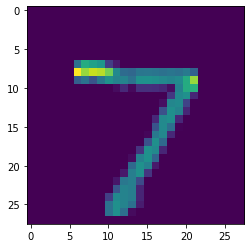

In [27]:
plt.imshow(x_test[0])

## Congrats!! Our model has correctly predicted the number